<a href="https://colab.research.google.com/github/Nazmul-SWE/ml-learning-notes/blob/main/Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**📊 Statistical Analysis Topics**



In [2]:


import pandas as pd
import numpy as np



In [4]:
# We'll create a feature vector with a few outliers so we can see:
# - mean vs median difference
# - ±3σ and IQR outlier detection
# - skewness/kurtosis behavior

x = np.concatenate([
    np.random.normal(loc=50, scale=10, size=95),  # "typical" values
    np.array([120, 130, 140, 5, 8])               # outliers (high + low)
])

print("Count:", x.size)
print("First 10:", x[:10])

Count: 100
First 10: [43.20476138 46.83572008 45.58455271 36.50969614 38.13764808 71.42145507
 49.95047058 40.03397795 35.64037995 42.90676111]


In [5]:
from IPython.display import HTML

HTML("""
<iframe width="560" height="315" src="https://www.youtube.com/embed/i373-Vc2d4o?si=g33RiXfjTcZHKD5d" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>
""")

In [7]:

print("Mean:", np.mean(x))
print("Median:", np.median(x))
print("Std:", np.std(x))

Mean: 50.20119684620253
Median: 48.61637283725297
Std: 18.334089956520273


In [9]:
Median=np.median(np.array([1,2,3,3,4,5,5000]))
print(Median)

3.0


In [10]:
mean_x = np.mean(x)
median_x = np.median(x)

# Mode in pure NumPy (works best for discrete values)
vals, counts = np.unique(x, return_counts=True)
mode_x = vals[np.argmax(counts)]  # for continuous random data, mode often isn't meaningful

print("Mean  :", mean_x)
print("Median:", median_x)
print("Mode  :", mode_x, "(Note: mode is not very meaningful for continuous random data)")

Mean  : 50.20119684620253
Median: 48.61637283725297
Mode  : 5.0 (Note: mode is not very meaningful for continuous random data)


In [11]:
#-----------q1--------/--------q2-------/---------q3-------/----------q4--------/
std_x = np.std(x, ddof=0)  # population std (ddof=0). For sample std, use ddof=1.

lower_3s = mean_x - 3 * std_x
upper_3s = mean_x + 3 * std_x

outliers_3s = x[(x < lower_3s) | (x > upper_3s)]

print("Std dev:", std_x)
print("3σ range:", (lower_3s, upper_3s))
print("Outliers by ±3σ rule:", outliers_3s)
print("Outlier count:", outliers_3s.size)

Std dev: 18.334089956520273
3σ range: (np.float64(-4.801073023358292), np.float64(105.20346671576334))
Outliers by ±3σ rule: [120. 130. 140.]
Outlier count: 3


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:

tips = sns.load_dataset('tips')



In [15]:
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [16]:
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [17]:
tips.day.value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


In [18]:
tips.tip.value_counts()

,count
tip,
2.00,33
3.00,23
4.00,12
2.50,10
5.00,10
...,...
1.47,1
1.17,1
4.67,1


<Axes: ylabel='Frequency'>

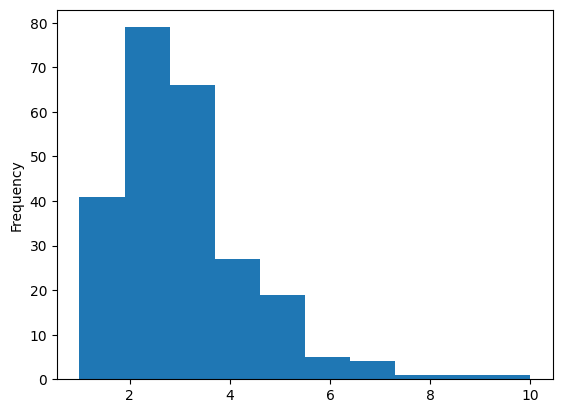

In [19]:
tips.tip.plot(kind='hist')


In [20]:
tips.smoker.value_counts()

,count
smoker,
No,151
Yes,93


<Axes: xlabel='smoker'>

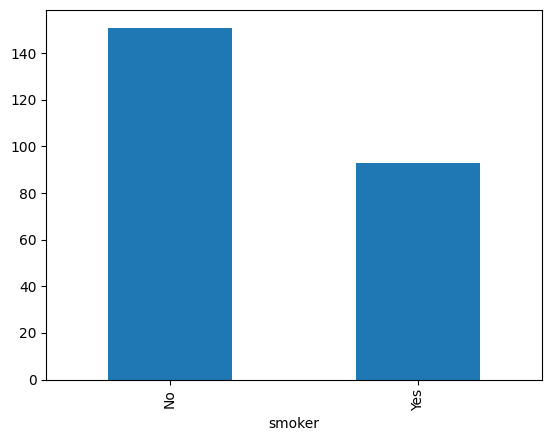

In [22]:
tips.smoker.value_counts().plot (kind='bar')

/tmp/ipython-input-4232002489.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day', data=tips ,palette='flare')


<Axes: xlabel='day', ylabel='count'>

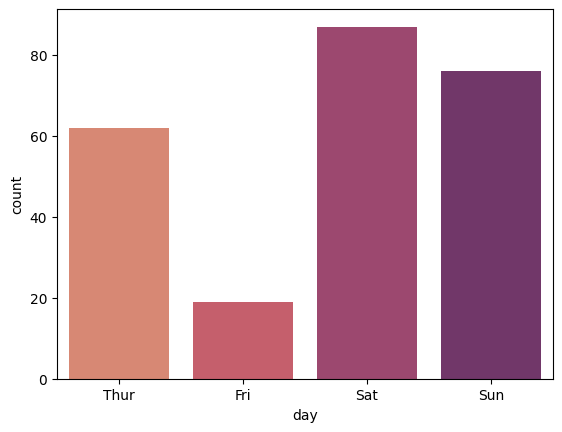

In [24]:
sns.countplot(x='day', data=tips ,palette='flare')

/tmp/ipython-input-592652257.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=tips, palette='flare')


<Axes: xlabel='smoker', ylabel='count'>

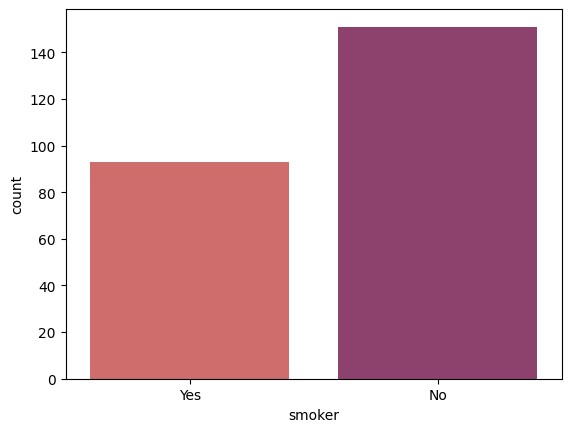

In [25]:
sns.countplot(x='smoker', data=tips, palette='flare')

/tmp/ipython-input-21351172.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips.total_bill, kde=True)


<Axes: xlabel='total_bill', ylabel='Density'>

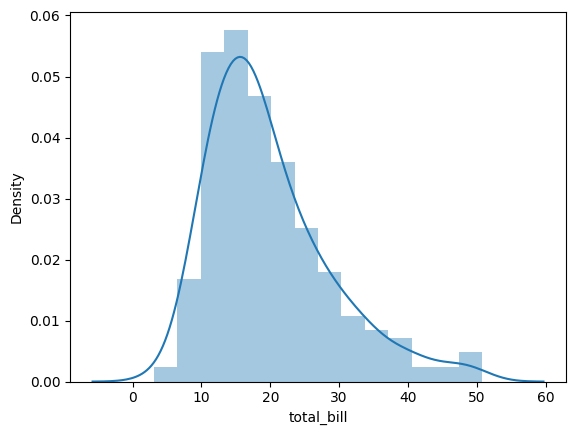

In [26]:
sns.distplot(tips.total_bill, kde=True)

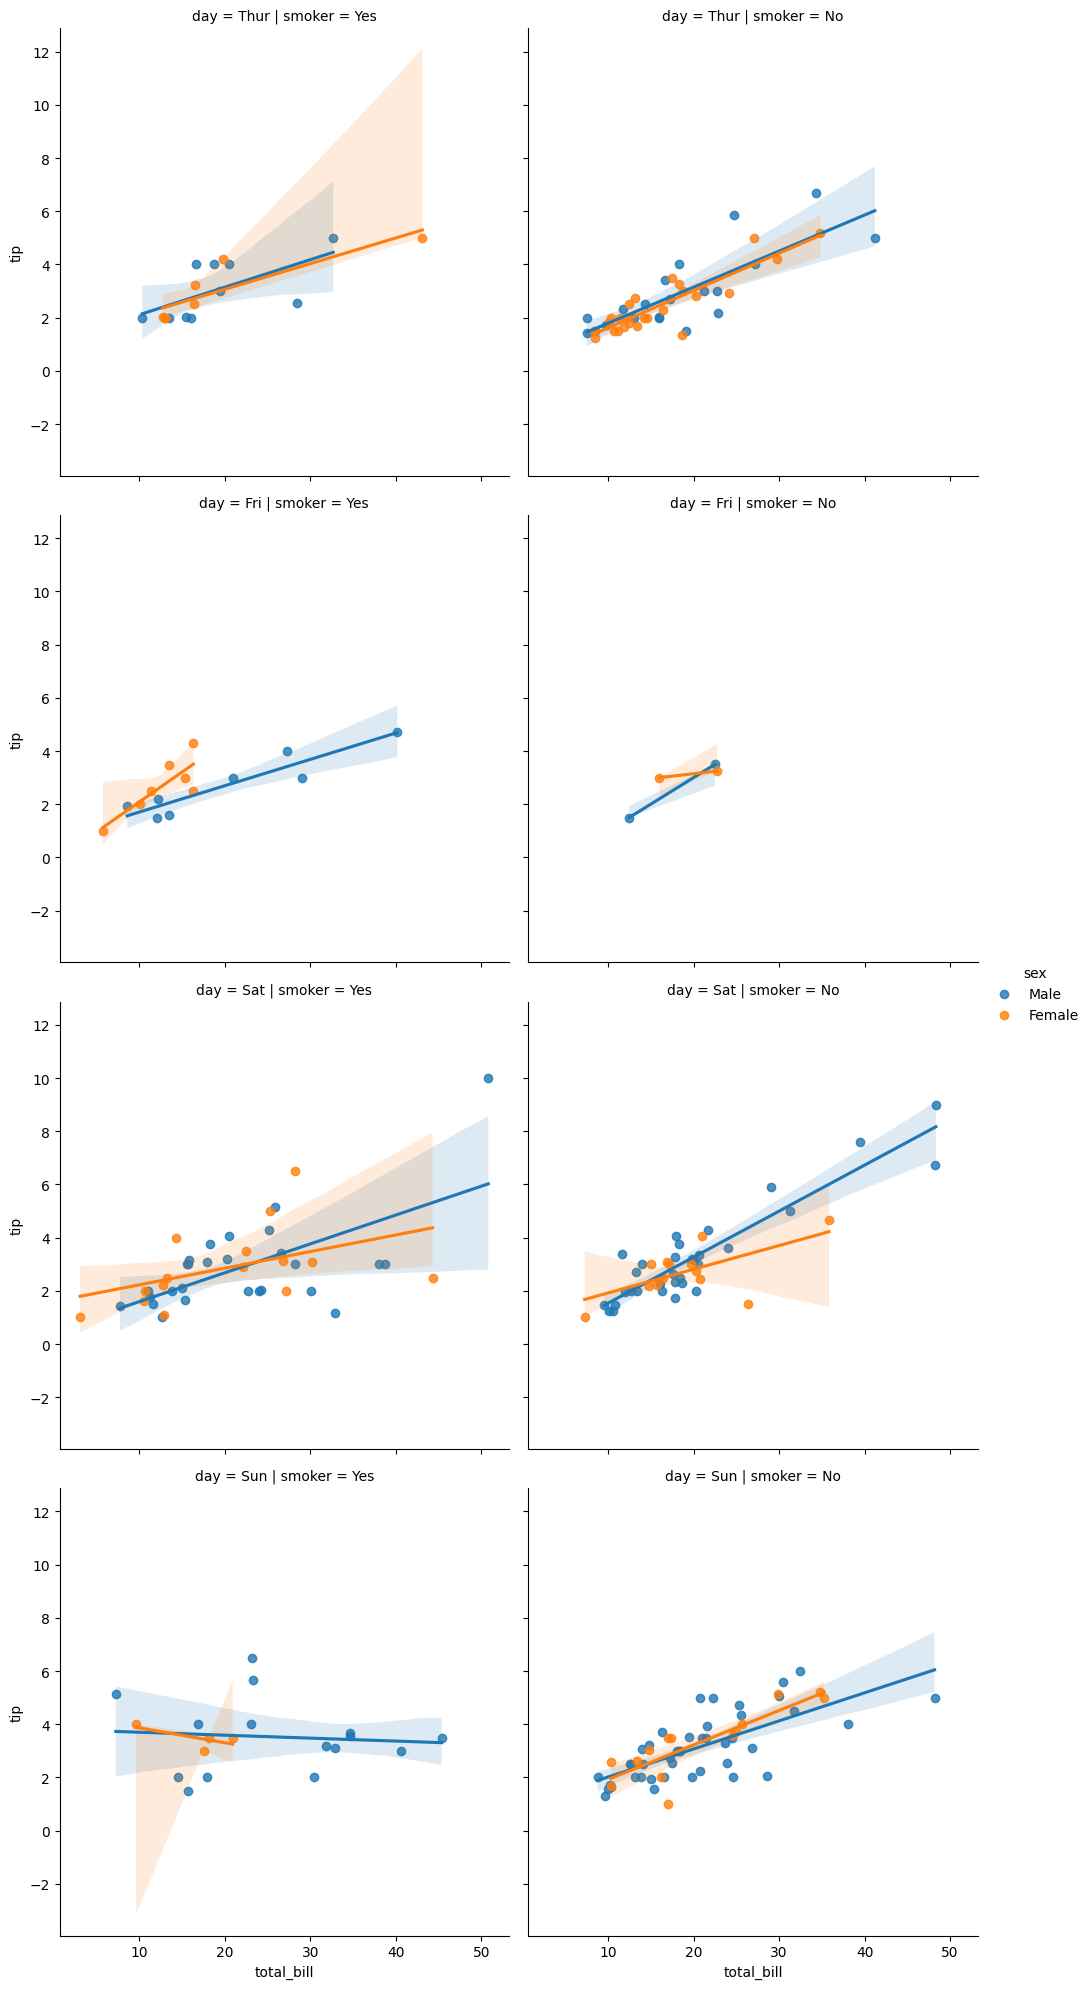

In [27]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', col='smoker', row='day')

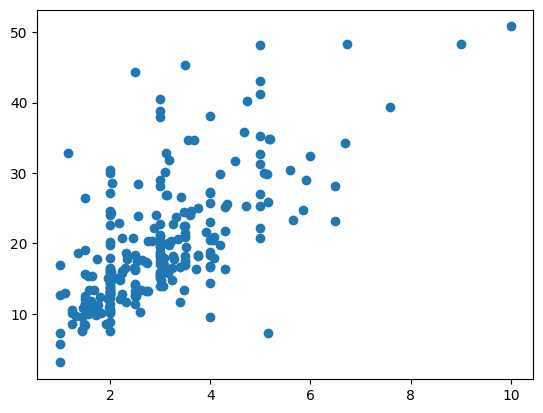

In [28]:
fig, ax = plt.subplots(1,1)
ax.scatter(tips.tip, tips.total_bill)

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

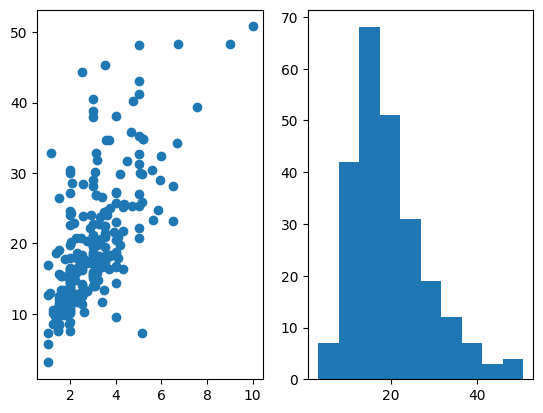

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(tips.tip, tips.total_bill)
ax2.hist(tips.total_bill)